In [ ]:
!pip install -U -q albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
%pip install -U -q git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

  Preparing metadata (setup.py) ... done


In [ ]:
!git clone https://github.com/garima-mahato/ERA_V3.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 335 (delta 18), reused 25 (delta 10), pack-reused 297
Receiving objects: 100% (335/335), 7.47 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
from ERA_V3.gmo import *

In [ ]:

# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


## Model Architecture

In [ ]:
model = CIFAR10_NoMPNetwork4().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           2,048
           Conv2d-14           [-1, 32,

## Dataset Creation

In [ ]:
SEED = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = './data'
need_albumentation = True
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_loader, test_loader = generate_train_test_loader(DATA_PATH, SEED, means, stdevs, need_albumentation)

100%|██████████| 170498071/170498071 [00:12<00:00, 13165032.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Data Visualization

 ship  bird   cat   dog


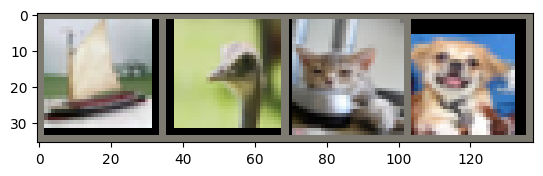

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(4)))

## Model Training and Testing

In [ ]:
# Data to plot accuracy and loss graphs
train_losses1 = []
test_losses1 = []
train_acc1 = []
test_acc1 = []

test_incorrect_pred1 = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05
STEP_SIZE = 14

model1 = CIFAR10_NoMPNetwork(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model1, device, train_loader, optimizer, train_acc1, train_losses1)
  test(model1, device, test_loader, test_acc1, test_losses1)
  if epoch <= STEP_SIZE:
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Train: Loss=1.0656 Batch_id=390 Accuracy=42.70: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s]


Test set: Average loss: 1.3007, Accuracy: 5258/10000 (52.58%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=1.0857 Batch_id=390 Accuracy=59.41: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]


Test set: Average loss: 1.0396, Accuracy: 6290/10000 (62.90%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.9856 Batch_id=390 Accuracy=66.17: 100%|██████████| 391/391 [00:32<00:00, 12.19it/s]


Test set: Average loss: 0.9272, Accuracy: 6745/10000 (67.45%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.7146 Batch_id=390 Accuracy=70.75: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s]


Test set: Average loss: 0.7617, Accuracy: 7333/10000 (73.33%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.8645 Batch_id=390 Accuracy=73.59: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]


Test set: Average loss: 0.8671, Accuracy: 7062/10000 (70.62%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=0.7622 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]


Test set: Average loss: 0.8155, Accuracy: 7244/10000 (72.44%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7


Train: Loss=0.6482 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]


Test set: Average loss: 0.6510, Accuracy: 7802/10000 (78.02%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8


Train: Loss=0.6252 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]


Test set: Average loss: 0.6061, Accuracy: 7921/10000 (79.21%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9


Train: Loss=0.6144 Batch_id=390 Accuracy=79.36: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]


Test set: Average loss: 0.6268, Accuracy: 7865/10000 (78.65%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10


Train: Loss=0.5372 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]


Test set: Average loss: 0.6086, Accuracy: 8010/10000 (80.10%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 11


Train: Loss=0.5687 Batch_id=390 Accuracy=81.19: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]


Test set: Average loss: 0.6138, Accuracy: 7980/10000 (79.80%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 12


Train: Loss=0.4351 Batch_id=390 Accuracy=81.85: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]


Test set: Average loss: 0.5513, Accuracy: 8148/10000 (81.48%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 13


Train: Loss=0.3758 Batch_id=390 Accuracy=82.47: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]


Test set: Average loss: 0.5573, Accuracy: 8218/10000 (82.18%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 14


Train: Loss=0.5081 Batch_id=390 Accuracy=82.88: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]


Test set: Average loss: 0.5824, Accuracy: 8106/10000 (81.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.4065 Batch_id=390 Accuracy=85.81: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]


Test set: Average loss: 0.4541, Accuracy: 8474/10000 (84.74%)

Epoch 16


Train: Loss=0.2946 Batch_id=390 Accuracy=87.09: 100%|██████████| 391/391 [00:30<00:00, 12.61it/s]


Test set: Average loss: 0.4503, Accuracy: 8518/10000 (85.18%)

Epoch 17


Train: Loss=0.3998 Batch_id=390 Accuracy=87.31: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]


Test set: Average loss: 0.4438, Accuracy: 8566/10000 (85.66%)

Epoch 18


Train: Loss=0.2772 Batch_id=390 Accuracy=87.56: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]


Test set: Average loss: 0.4406, Accuracy: 8556/10000 (85.56%)

Epoch 19


Train: Loss=0.3993 Batch_id=390 Accuracy=87.60: 100%|██████████| 391/391 [00:32<00:00, 12.16it/s]


Test set: Average loss: 0.4420, Accuracy: 8560/10000 (85.60%)

Epoch 20


Train: Loss=0.2813 Batch_id=390 Accuracy=87.90: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s]


Test set: Average loss: 0.4453, Accuracy: 8551/10000 (85.51%)



In [ ]:
save_network('ERA_V3', 's8_saved_model_final_submission', model1, train_losses1, test_losses1, train_acc1, test_acc1)


 Saving trained model and parameters...


### Accuracy/Loss Visualization


 Saving trained model and parameters...


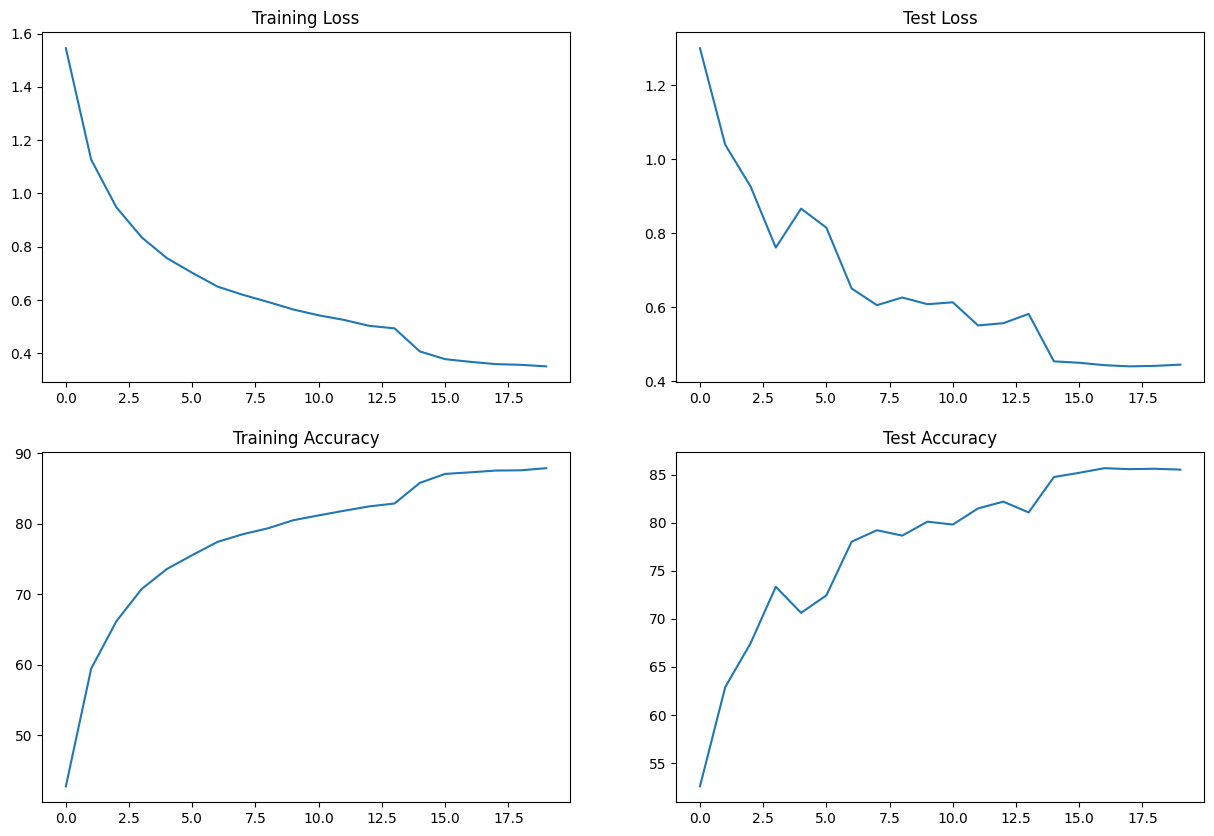

In [ ]:
vis_train_test_comp_graphs(train_losses1, train_acc1, test_losses1, test_acc1)

#### 10 Mis-classified CIFAR10 Data

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


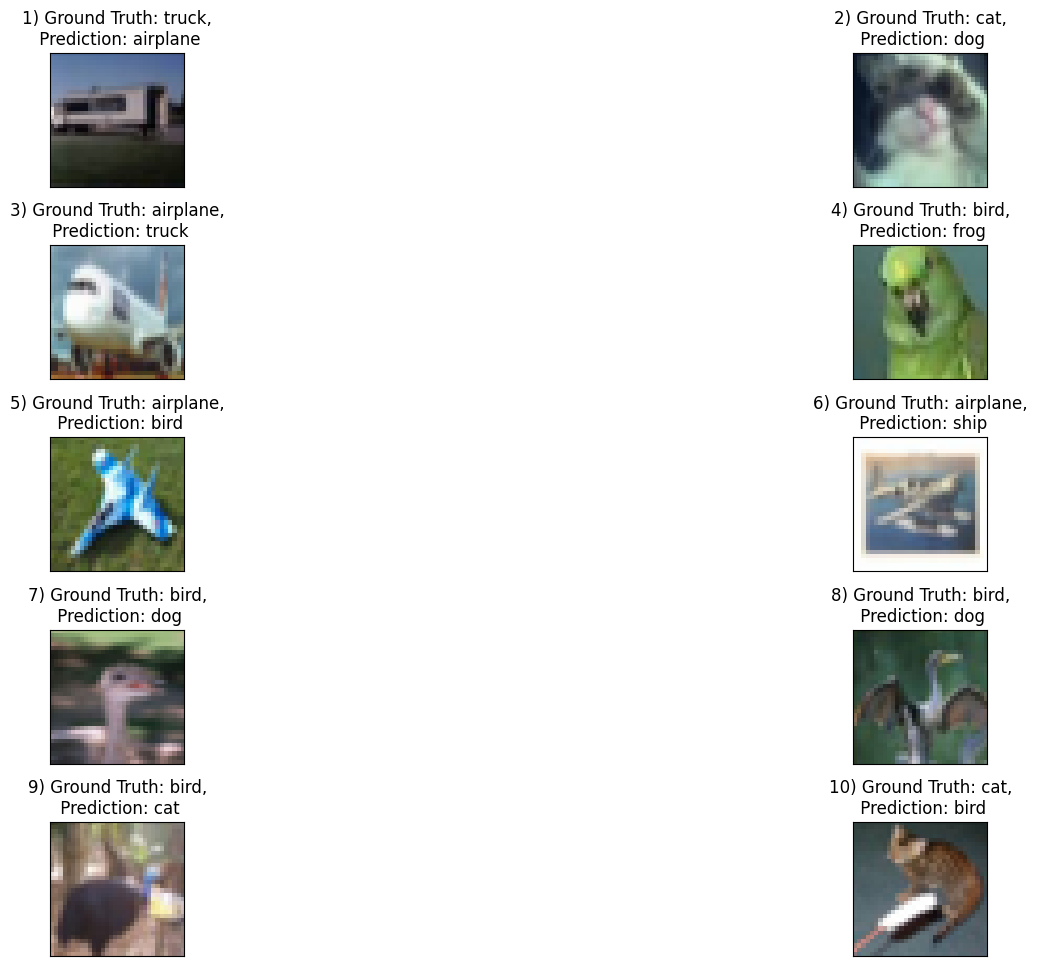

In [ ]:
show_save_misclassified_images(model, test_loader, device, 'ERA_V3', name="cifar10_s8_final_misclassified_imgs", max_misclassified_imgs=10)

#### Model Visualization

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


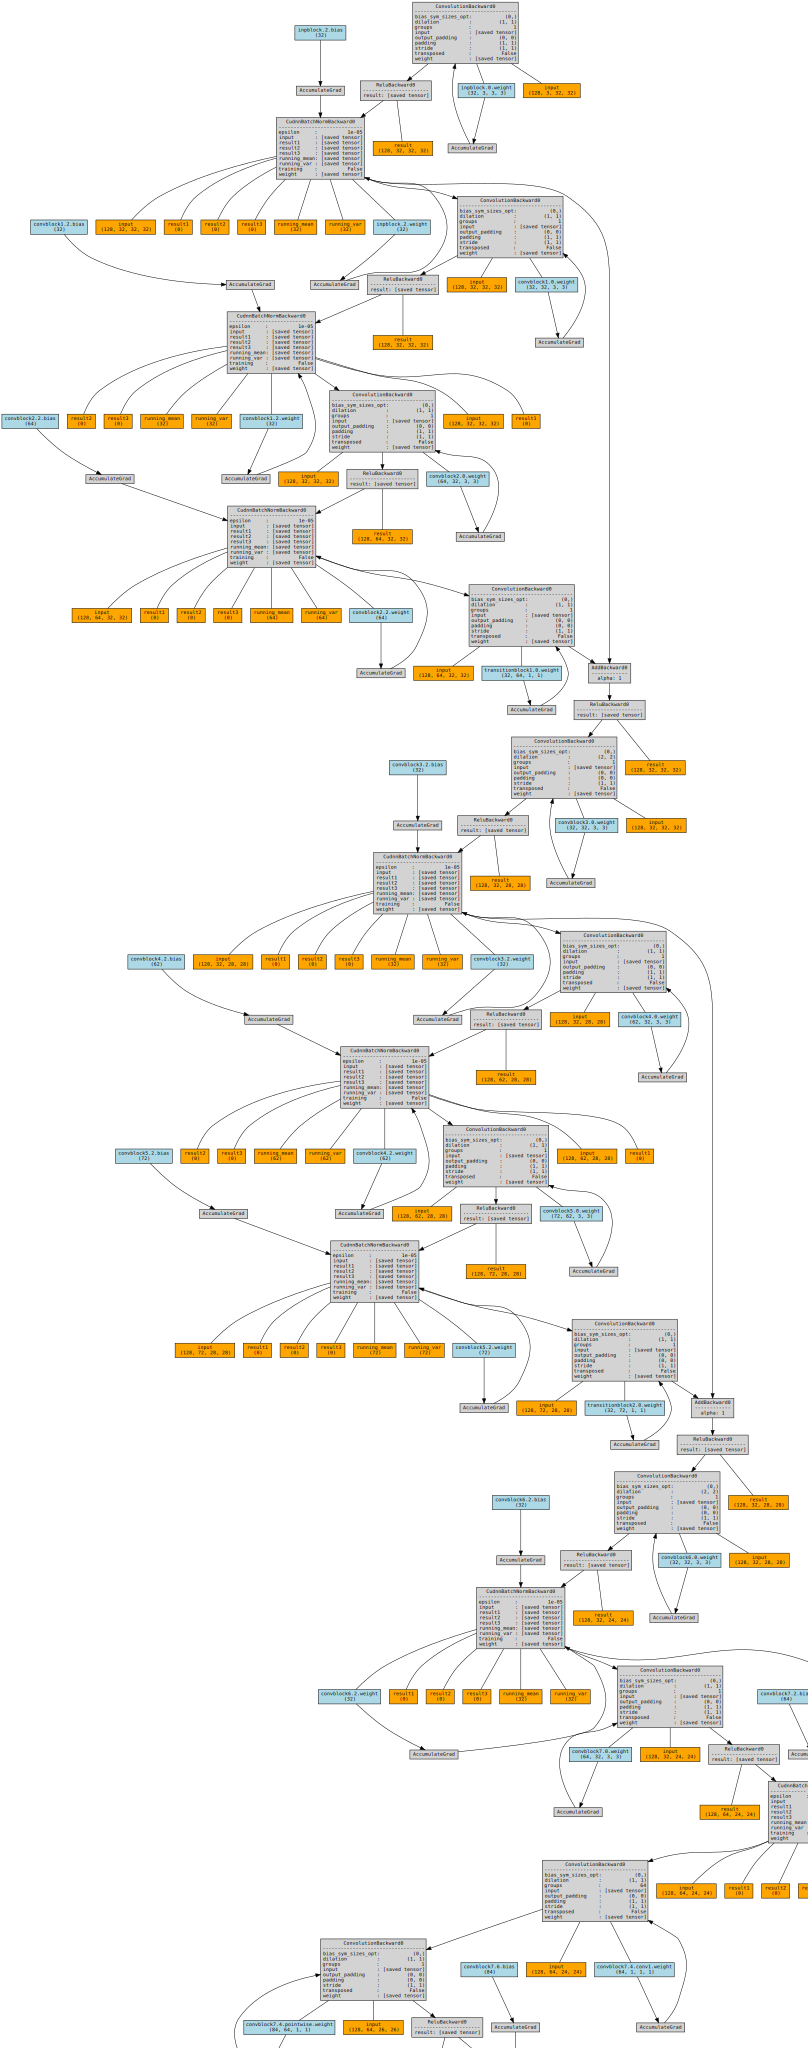

In [ ]:
batch_data, batch_label = next(iter(train_loader))
batch_data = batch_data.to(device)
y = model1(batch_data)

make_dot(y, params=dict(list(model1.named_parameters())), show_attrs=True, show_saved=True)

In [ ]:
make_dot(y, params=dict(list(model1.named_parameters())), show_attrs=True, show_saved=True).render("cifar10_s8__finaltorchviz", format="png")